## feature engineering

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 추가한 새로운 feature
def cal_sm_1(new_dt):

  PA = new_dt['PA'] #타석
  AB = new_dt['AB'] #타수
  RBI = new_dt['RBI'] #타점
  RUN = new_dt['RUN'] #득점
  HIT = new_dt['HIT'] #총안타
  H2 = new_dt['H2'] #2루타
  H3 = new_dt['H3'] #3루타
  HR = new_dt['HR'] #홈런
  SB = new_dt['SB'] #도루
  CS = new_dt['CS'] #도루실패
  SH = new_dt['SH'] #희생타
  SF = new_dt['SF'] #희생플라이
  IB = new_dt['IB'] #고의4구
  HP = new_dt['HP'] #빈볼
  BB = new_dt['BB'] #총사구
  KK = new_dt['KK'] #삼진
  GD = new_dt['GD'] #병살타
  ERR = new_dt['ERR'] #실책

  # 타율 계산
  new_dt['AVG'] = HIT/AB

  # 순수 1루타 계산
  new_dt['H1'] = HIT - H2 - H3 - HR
  H1 = new_dt['H1']

  # OBP(출루율)
  new_dt['OBP'] = (HIT+BB+HP)/(AB+BB+SF+HP)
  # SLG(장타율)
  new_dt['SLG'] = (H1+2*H2+3*H3+4*HR)/AB

  # OPS = OBP+SLG
  OBP = new_dt['OBP']
  SLG = new_dt['SLG']
  new_dt['OPS'] = OBP + SLG

  # GPA = (1.8*OBP+SLG)/4 OPS의 단점을 보완
  new_dt['GPA'] = (1.8*new_dt['OBP'] + new_dt['SLG'])/4

  # IsoP = SLG - AVG 순수장타율
  AVG = new_dt['AVG']
  new_dt['IsoP'] = SLG - AVG

  # RC(Run Created)
  new_dt['RC'] = ((HIT+BB-CS+HP-GD) * ((H1+2*H2+3*H3+4*HR)+0.26*(BB-IB+HP)) + (0.52*SH+SF+SB)) / (AB+BB+HP+SH+SF)

  # XR (eXtrapolated Runs, 추정득점(타자의 득점공헌도))
  new_dt['XR'] = (H1*0.5 + H2*0.72 + H3*1.04 + HR*1.44 + (HP+BB-IB)*0.34 + IB*0.25 + SB*0.18 - CS*0.32
                  - (AB-HIT-KK)*0.09 - KK*0.098 - GD*0.37 + SF*0.37 + SH*0.04 )

  # BABIP = (총 안타수-홈런)/(타수-삼진-홈런+희생플라이)
  new_dt['BABIP'] = (HIT-HR)/(AB-KK-HR+SF)

  # OBP = (HIT+BB+HP)/(AB+BB+SF+HP) 출루율
  new_dt['OBP'] = (HIT+BB+HP)/(AB+BB+SF+HP)

  # SLG = (HIT+2*H2+3*H3+4*HR)/AB 장타율
  new_dt['SLG'] = (H1+2*H2+3*H3+4*HR)/AB

  # OPS+ = 100*((OBP/lgOBP+SLG/lgSLG)-1)[/BPF]
  # lgOBP: 리그 평균 출루율 / lgSLG: 리그 평균 장타율
  lgOBP = new_dt['OBP'].mean() # 결측값(NaN) 제외하고 리그 평균 계산
  lgSLG = new_dt['SLG'].mean()
  new_dt['OPS_plus'] = 100*((new_dt['OBP']/lgOBP+new_dt['SLG']/lgSLG)-1)

  # 타수가 극단적으로 적은 타자들로 인해 기록이 부정확할 확률이 높음
  # OPS+ 계산에는 원래 파크팩터를 사용하기도 함. 그러나 시즌 총 기록에서 경기별 패크팩터를 어떻게 대입할지는 모르겠음.

  return new_dt

In [ ]:
# 2016 데이터로 확인 
df = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv')
df.tail()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
1435,20161008SSSK0,20161008,SS,SK,0,T,39,36,5,6,10,2,0,2,1,0,0,0,3,0,0,4,1,2,6,0.250000,8,2
1436,20161009KTNC0,20161009,NC,KT,0,B,41,39,3,4,12,4,0,0,4,1,0,0,1,0,1,13,0,0,10,0.111111,18,2
1437,20161009KTNC0,20161009,KT,NC,0,T,43,38,5,7,14,3,0,0,1,0,1,1,3,0,0,7,0,0,9,0.100000,10,1
1438,20161009WOLT0,20161009,LT,WO,0,B,38,36,8,8,11,2,0,2,1,0,0,0,1,0,1,4,2,0,6,0.416667,12,5
1439,20161009WOLT0,20161009,WO,LT,0,T,38,33,5,5,10,0,0,0,0,1,0,2,3,0,0,6,1,3,6,0.428571,7,3


In [ ]:
# 쓰이지 않는 피처 제거
df.drop(['G_ID'], axis=1, inplace=True)
df.drop(['GDAY_DS'], axis=1, inplace=True)
df.drop(['HEADER_NO'], axis=1, inplace=True)
df.drop(['TB_SC'], axis=1, inplace=True)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

team_label = encoder.fit_transform(df['T_ID'])
vs_team_label = encoder.fit_transform(df['VS_T_ID'])

print(team_label)
print(vs_team_label)

[3 0 5 ... 2 4 9]
[0 3 1 ... 5 9 4]


In [ ]:
df['T_ID'] = team_label
df['VS_T_ID'] = vs_team_label

df.tail()

,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
1435,8,7,39,36,5,6,10,2,0,2,1,0,0,0,3,0,0,4,1,2,6,0.250000,8,2
1436,5,2,41,39,3,4,12,4,0,0,4,1,0,0,1,0,1,13,0,0,10,0.111111,18,2
1437,2,5,43,38,5,7,14,3,0,0,1,0,1,1,3,0,0,7,0,0,9,0.100000,10,1
1438,4,9,38,36,8,8,11,2,0,2,1,0,0,0,1,0,1,4,2,0,6,0.416667,12,5
1439,9,4,38,33,5,5,10,0,0,0,0,1,0,2,3,0,0,6,1,3,6,0.428571,7,3


In [ ]:
df.info() # null, object check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T_ID      1440 non-null   int64  
 1   VS_T_ID   1440 non-null   int64  
 2   PA        1440 non-null   int64  
 3   AB        1440 non-null   int64  
 4   RBI       1440 non-null   int64  
 5   RUN       1440 non-null   int64  
 6   HIT       1440 non-null   int64  
 7   H2        1440 non-null   int64  
 8   H3        1440 non-null   int64  
 9   HR        1440 non-null   int64  
 10  SB        1440 non-null   int64  
 11  CS        1440 non-null   int64  
 12  SH        1440 non-null   int64  
 13  SF        1440 non-null   int64  
 14  BB        1440 non-null   int64  
 15  IB        1440 non-null   int64  
 16  HP        1440 non-null   int64  
 17  KK        1440 non-null   int64  
 18  GD        1440 non-null   int64  
 19  ERR       1440 non-null   int64  
 20  LOB       1440 non-null   int6

In [ ]:
#  팀 Set 제작
team = set()
for i in df['T_ID']:
  team.add(i)
print("2016년 참여 팀 수 :", len(team))

2016년 참여 팀 수 : 10


In [ ]:
df = cal_sm_1(df)
df.head()

,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,AVG,H1,OBP,SLG,OPS,GPA,IsoP,RC,XR,BABIP,OPS_plus
0,3,0,47,42,4,5,9,2,0,1,2,1,1,0,4,0,0,11,0,0,8,0.333333,12,4,0.214286,6,0.282609,0.333333,0.615942,0.210507,0.119048,3.893617,4.262,0.266667,57.164141
1,0,3,52,46,4,4,13,2,0,0,0,0,3,0,3,0,0,10,1,2,12,0.200000,15,3,0.282609,11,0.326531,0.326087,0.652618,0.228461,0.043478,4.581923,4.660,0.361111,67.786035
2,5,1,36,30,5,5,9,2,0,2,0,0,1,0,5,0,0,9,1,1,7,0.142857,7,1,0.300000,5,0.400000,0.566667,0.966667,0.321667,0.266667,6.622778,6.228,0.368421,144.624940
3,1,5,38,34,3,4,8,3,0,1,0,0,0,0,3,0,1,10,1,0,7,0.100000,10,1,0.235294,4,0.315789,0.411765,0.727554,0.245046,0.176471,4.353684,4.170,0.304348,84.802227
4,7,2,36,36,4,4,10,5,0,1,0,0,0,0,0,0,0,7,1,1,5,0.375000,8,3,0.277778,4,0.277778,0.500000,0.777778,0.250000,0.222222,4.500000,4.274,0.321429,94.769544


In [ ]:
cl = df.columns.tolist()
arr = []
df18 = pd.DataFrame(index=range(0,0), columns=cl) 
print(df18)
for i in team :
  # 선수 별로 새로운 Dataframe 생성
  hitter_df = df[df['T_ID'] == i ]
  hitter_df.reset_index(drop=True, inplace=True)
    
  # 경기 데이터가 18개 이상이라면
  count = len(hitter_df)//18
    
  if count != 0 :
    #print(count)
    for k in range(count):
      s = k * 18
      #print(s,'부터',s+17,'까지의 합')

      total = hitter_df.loc[s] + hitter_df.loc[s+1] + hitter_df.loc[s+2] + hitter_df.loc[s+3] + hitter_df.loc[s+4] + hitter_df.loc[s+5]+ hitter_df.loc[s+6] + hitter_df.loc[s+7] + hitter_df.loc[s+8] + hitter_df.loc[s+9] + hitter_df.loc[s+10] + hitter_df.loc[s+11]+ hitter_df.loc[s+12] + hitter_df.loc[s+13] + hitter_df.loc[s+14] + hitter_df.loc[s+15] + hitter_df.loc[s+16] + hitter_df.loc[s+17]
      total = total / 18

      df18 = df18.append(pd.Series(total, index=df18.columns), ignore_index=True)
      #print(k, end=' ')
      if k == 0 :
        pass
      else :
        arr.append(total['AVG'])
    arr.append(0)

Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, P_HRA_RT, P_AB_CN, P_HIT_CN, AVG, H1, OBP, SLG, OPS, GPA, IsoP, RC, XR, BABIP, OPS_plus]
Index: []


In [ ]:
df18['label']=arr
df18 = df18[df18['label']!=0]
df18_2 = df18.copy()

df18_2 = df18_2.fillna(0)
df18_2.reset_index(drop=True, inplace=True)

In [ ]:
df18_2

,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,AVG,H1,OBP,SLG,OPS,GPA,IsoP,RC,XR,BABIP,OPS_plus,label
0,0.0,5.333333,39.888889,35.111111,3.500000,3.722222,9.388889,1.666667,0.111111,0.500000,0.333333,0.222222,0.888889,0.111111,3.222222,0.222222,0.555556,8.166667,1.111111,0.833333,8.333333,0.239167,9.555556,2.222222,0.263539,7.111111,0.332277,0.357191,0.689468,0.238822,0.093652,4.285463,4.129667,0.330310,76.668216,0.251589
1,0.0,4.444444,38.944444,33.611111,4.222222,4.500000,8.722222,1.500000,0.055556,0.888889,0.722222,0.222222,0.555556,0.277778,4.055556,0.166667,0.444444,7.333333,0.833333,1.166667,7.666667,0.221771,8.277778,2.000000,0.251589,6.277778,0.338219,0.378336,0.716555,0.246783,0.126747,4.722567,4.648556,0.292843,83.277284,0.298701
2,0.0,5.944444,41.722222,36.555556,6.444444,6.611111,10.944444,2.000000,0.166667,1.166667,0.611111,0.333333,0.500000,0.166667,3.777778,0.166667,0.722222,6.444444,0.666667,0.444444,8.111111,0.327497,10.388889,3.333333,0.298701,7.611111,0.371567,0.458981,0.830548,0.281950,0.160280,6.424161,6.095667,0.333523,111.479614,0.288870
3,0.0,5.055556,39.833333,35.611111,5.055556,5.055556,10.333333,1.388889,0.277778,1.388889,0.388889,0.333333,0.444444,0.333333,2.888889,0.166667,0.555556,7.722222,0.833333,0.555556,7.611111,0.277988,9.222222,2.555556,0.288870,7.277778,0.346885,0.460150,0.807035,0.271136,0.171280,5.776253,5.543222,0.331675,104.832128,0.303723
4,0.0,5.111111,41.555556,35.722222,7.166667,7.333333,11.055556,1.833333,0.277778,1.222222,0.611111,0.388889,0.388889,0.388889,4.555556,0.000000,0.500000,5.777778,0.833333,0.444444,7.555556,0.328565,10.111111,3.555556,0.303723,7.722222,0.383890,0.470915,0.854805,0.290479,0.167192,6.884832,6.519333,0.331479,117.724848,0.296674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,9.0,3.388889,37.833333,33.555556,4.277778,4.555556,9.388889,1.388889,0.333333,0.888889,1.000000,0.444444,0.500000,0.222222,3.333333,0.055556,0.222222,6.333333,1.000000,0.500000,7.000000,0.276568,9.000000,2.722222,0.272548,6.777778,0.337612,0.408155,0.745766,0.253964,0.135607,4.962820,4.763778,0.311914,90.077299,0.289702
66,9.0,3.388889,40.444444,35.166667,5.777778,6.222222,10.333333,2.055556,0.222222,0.722222,1.333333,0.333333,0.222222,0.388889,4.055556,0.111111,0.611111,6.833333,1.000000,0.611111,7.555556,0.346250,10.944444,3.944444,0.289702,7.333333,0.369351,0.423925,0.793276,0.272189,0.134223,5.700223,5.620889,0.339186,102.663607,0.331549
67,9.0,3.277778,41.666667,35.500000,7.055556,7.722222,11.833333,2.388889,0.333333,1.277778,1.166667,0.777778,0.277778,0.555556,4.888889,0.222222,0.444444,5.222222,0.777778,0.722222,7.777778,0.364150,10.888889,3.888889,0.331549,7.833333,0.411428,0.521701,0.933129,0.315568,0.190152,7.616918,7.334889,0.358204,137.318143,0.293909
68,9.0,4.888889,39.500000,34.666667,4.833333,5.111111,10.388889,1.611111,0.166667,1.055556,1.222222,0.555556,0.222222,0.444444,3.777778,0.166667,0.388889,5.722222,0.944444,0.722222,7.611111,0.228765,10.333333,2.611111,0.293909,7.555556,0.364748,0.438844,0.803591,0.273847,0.144935,5.742252,5.668111,0.326475,104.860238,0.282834


In [ ]:
df18_3 = df18_2[['AB', 'HIT', 'KK', 'AVG', 'OPS', 'RC', 'BABIP', 'OPS_plus', 'label']]
df18_3

,AB,HIT,KK,AVG,OPS,RC,BABIP,OPS_plus,label
0,35.111111,9.388889,8.166667,0.263539,0.689468,4.285463,0.330310,76.668216,0.251589
1,33.611111,8.722222,7.333333,0.251589,0.716555,4.722567,0.292843,83.277284,0.298701
2,36.555556,10.944444,6.444444,0.298701,0.830548,6.424161,0.333523,111.479614,0.288870
3,35.611111,10.333333,7.722222,0.288870,0.807035,5.776253,0.331675,104.832128,0.303723
4,35.722222,11.055556,5.777778,0.303723,0.854805,6.884832,0.331479,117.724848,0.296674
...,...,...,...,...,...,...,...,...,...
65,33.555556,9.388889,6.333333,0.272548,0.745766,4.962820,0.311914,90.077299,0.289702
66,35.166667,10.333333,6.833333,0.289702,0.793276,5.700223,0.339186,102.663607,0.331549
67,35.500000,11.833333,5.222222,0.331549,0.933129,7.616918,0.358204,137.318143,0.293909
68,34.666667,10.388889,5.722222,0.293909,0.803591,5.742252,0.326475,104.860238,0.282834


## multi regressor
- xgb
- lgb
- random forest

Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df18_3['label']
X_data = df18_3.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.018401179647383876


In [ ]:
print(np.mean(abs(y_pred - y_test)))

0.013486259829856004


XGBoost

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

[02:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.021032699686255794


In [ ]:
print(np.mean(abs(y_pred - y_test)))

0.016398388841478435


LGBoost

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.01593087880446067


In [ ]:
print(np.mean(abs(y_pred - y_test)))

0.011911385285019066


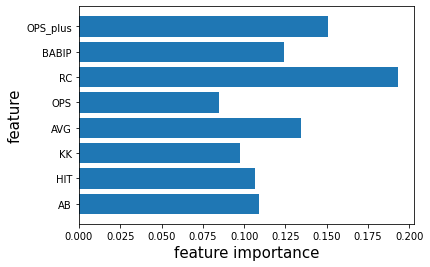

In [ ]:
# feature importance
import matplotlib.pyplot as plt
%matplotlib inline

n_feature = X_data.shape[1]

index = np.arange(n_feature)

plt.barh(index, xgb.feature_importances_)

plt.yticks(index, X_data.columns)


plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()



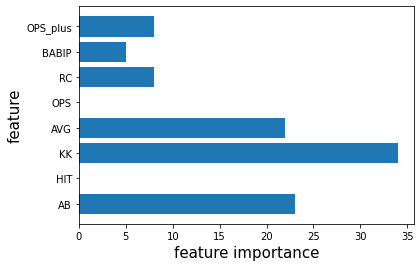

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n_feature = X_data.shape[1]

index = np.arange(n_feature)

plt.barh(index, lgb.feature_importances_)

plt.yticks(index, X_data.columns)


plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()



In [ ]:
# 각 데이터 묶어서 확인 
def years_preprocessing(df):

  # 쓰이지 않는 피처 제거
  df.drop(['G_ID'], axis=1, inplace=True)
  df.drop(['GDAY_DS'], axis=1, inplace=True)
  df.drop(['HEADER_NO'], axis=1, inplace=True)
  df.drop(['TB_SC'], axis=1, inplace=True)

  encoder = LabelEncoder()

  team_label = encoder.fit_transform(df['T_ID'])
  vs_team_label = encoder.fit_transform(df['VS_T_ID'])

  df['T_ID'] = team_label
  df['VS_T_ID'] = vs_team_label

  team = set()
  for i in df['T_ID']:
    team.add(i)

  df = cal_sm_1(df)

  cl = df.columns.tolist()
  arr = []
  df18 = pd.DataFrame(index=range(0,0), columns=cl) 
  print(df18)
  for i in team :
    # 선수 별로 새로운 Dataframe 생성
    hitter_df = df[df['T_ID'] == i ]
    hitter_df.reset_index(drop=True, inplace=True)
      
    # 경기 데이터가 18개 이상이라면
    count = len(hitter_df)//18
      
    if count != 0 :
      #print(count)
      for k in range(count):
        s = k * 18
        #print(s,'부터',s+17,'까지의 합')

        total = hitter_df.loc[s] + hitter_df.loc[s+1] + hitter_df.loc[s+2] + hitter_df.loc[s+3] + hitter_df.loc[s+4] + hitter_df.loc[s+5]+ hitter_df.loc[s+6] + hitter_df.loc[s+7] + hitter_df.loc[s+8] + hitter_df.loc[s+9] + hitter_df.loc[s+10] + hitter_df.loc[s+11]+ hitter_df.loc[s+12] + hitter_df.loc[s+13] + hitter_df.loc[s+14] + hitter_df.loc[s+15] + hitter_df.loc[s+16] + hitter_df.loc[s+17]
        total = total / 18

        df18 = df18.append(pd.Series(total, index=df18.columns), ignore_index=True)
        #print(k, end=' ')
        if k == 0 :
          pass
        else :
          arr.append(total['AVG'])
      arr.append(0)

  df18['label']=arr
  df18 = df18[df18['label']!=0]
  df18_2 = df18.copy()

  df18_2 = df18_2.fillna(0)
  df18_2.reset_index(drop=True, inplace=True)

  return df18_2

In [ ]:
# 전체 데이터 
df_16 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv')
df_17 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv')
df_18 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv')
df_19 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv')
df_20 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2020.csv')

In [ ]:
df_16 = years_preprocessing(df_16)
print('16년 DONE')
df_17 = years_preprocessing(df_17)
print('17년 DONE')
df_18 = years_preprocessing(df_18)
print('18년 DONE')
df_19 = years_preprocessing(df_19)
print('19년 DONE')
df_20 = years_preprocessing(df_20)
print('20년 DONE')

Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, P_HRA_RT, P_AB_CN, P_HIT_CN, AVG, H1, OBP, SLG, OPS, GPA, IsoP, RC, XR, BABIP, OPS_plus]
Index: []
16년 DONE
Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, P_HRA_RT, P_AB_CN, P_HIT_CN, AVG, H1, OBP, SLG, OPS, GPA, IsoP, RC, XR, BABIP, OPS_plus]
Index: []
17년 DONE
Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, P_HRA_RT, P_AB_CN, P_HIT_CN, AVG, H1, OBP, SLG, OPS, GPA, IsoP, RC, XR, BABIP, OPS_plus]
Index: []
18년 DONE
Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, P_HRA_RT, P_AB_CN, P_HIT_CN, AVG, H1, OBP, SLG, OPS, GPA, IsoP, RC, XR, BABIP, OPS_plus]
Index: []
19년 DONE
Empty DataFrame
Columns: [T_ID, VS_T_ID, PA, AB, RBI, RUN, HIT, H2, H3, HR, SB, 

In [ ]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T_ID      70 non-null     float64
 1   VS_T_ID   70 non-null     float64
 2   PA        70 non-null     float64
 3   AB        70 non-null     float64
 4   RBI       70 non-null     float64
 5   RUN       70 non-null     float64
 6   HIT       70 non-null     float64
 7   H2        70 non-null     float64
 8   H3        70 non-null     float64
 9   HR        70 non-null     float64
 10  SB        70 non-null     float64
 11  CS        70 non-null     float64
 12  SH        70 non-null     float64
 13  SF        70 non-null     float64
 14  BB        70 non-null     float64
 15  IB        70 non-null     float64
 16  HP        70 non-null     float64
 17  KK        70 non-null     float64
 18  GD        70 non-null     float64
 19  ERR       70 non-null     float64
 20  LOB       70 non-null     float64


In [ ]:
df_all = pd.concat([df_16, df_17, df_18, df_19, df_20])
len(df_all) == len(df_16)+len(df_17)+len(df_18)+len(df_19)+len(df_20)

True

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 19
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T_ID      300 non-null    float64
 1   VS_T_ID   300 non-null    float64
 2   PA        300 non-null    float64
 3   AB        300 non-null    float64
 4   RBI       300 non-null    float64
 5   RUN       300 non-null    float64
 6   HIT       300 non-null    float64
 7   H2        300 non-null    float64
 8   H3        300 non-null    float64
 9   HR        300 non-null    float64
 10  SB        300 non-null    float64
 11  CS        300 non-null    float64
 12  SH        300 non-null    float64
 13  SF        300 non-null    float64
 14  BB        300 non-null    float64
 15  IB        300 non-null    float64
 16  HP        300 non-null    float64
 17  KK        300 non-null    float64
 18  GD        300 non-null    float64
 19  ERR       300 non-null    float64
 20  LOB       300 non-null    float64

In [ ]:
df_all_3 = df_all.drop(['T_ID', 'VS_T_ID', 'PA', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'HP', 'ERR', 'LOB', 'P_AB_CN', 
                        'P_HIT_CN', 'H1'], axis=1)

In [ ]:
df_20

,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,AVG,H1,OBP,SLG,OPS,GPA,IsoP,RC,XR,BABIP,OPS_plus,label
0,0.0,4.666667,37.000000,33.500000,3.666667,3.833333,8.555556,1.555556,0.055556,0.611111,0.722222,0.444444,0.277778,0.111111,2.555556,0.000000,0.555556,7.111111,0.888889,0.388889,6.222222,0.236428,7.611111,2.000000,0.253086,6.333333,0.314183,0.357369,0.671551,0.230724,0.104283,3.703305,3.691444,0.309945,81.318856,0.206963
1,0.0,5.666667,35.444444,32.111111,2.500000,2.666667,6.833333,0.888889,0.000000,0.666667,0.388889,0.055556,0.222222,0.111111,2.666667,0.055556,0.333333,7.166667,1.111111,1.055556,6.000000,0.224339,6.000000,1.388889,0.206963,5.277778,0.275056,0.295040,0.570096,0.197535,0.088077,2.803282,2.612667,0.245579,54.338950,0.258109
2,1.0,5.666667,39.888889,34.944444,4.611111,4.888889,9.611111,2.000000,0.000000,0.888889,0.333333,0.222222,0.222222,0.277778,4.000000,0.000000,0.444444,7.111111,0.888889,0.666667,8.333333,0.224931,9.333333,2.388889,0.268238,6.722222,0.347362,0.399747,0.747109,0.256250,0.131510,5.430966,5.027000,0.313268,101.612128,0.268770
3,1.0,4.000000,37.555556,33.277778,4.888889,4.944444,9.055556,1.333333,0.111111,1.222222,0.388889,0.055556,0.333333,0.333333,3.111111,0.000000,0.500000,6.000000,0.722222,0.444444,6.944444,0.240508,8.388889,2.333333,0.268770,6.388889,0.335364,0.423533,0.758897,0.256797,0.154762,5.035695,4.951444,0.292475,103.927630,0.265229
4,2.0,4.055556,41.111111,36.666667,6.222222,6.666667,11.388889,2.111111,0.444444,1.055556,0.666667,0.388889,0.388889,0.611111,3.111111,0.055556,0.333333,6.888889,0.444444,0.666667,7.611111,0.243752,10.388889,3.000000,0.301105,7.777778,0.354219,0.461820,0.816040,0.274854,0.160715,6.880524,6.299889,0.339175,118.966040,0.268235
5,2.0,5.166667,37.944444,34.388889,4.555556,4.833333,9.444444,1.666667,0.111111,1.222222,0.333333,0.166667,0.222222,0.111111,2.888889,0.055556,0.333333,7.333333,0.555556,0.611111,7.277778,0.222810,8.222222,2.277778,0.268235,6.444444,0.322369,0.423895,0.746263,0.251040,0.155660,5.299712,4.935778,0.308931,100.165752,0.295404
6,3.0,5.888889,38.000000,33.222222,5.277778,5.500000,9.111111,1.833333,0.166667,1.000000,0.722222,0.166667,0.222222,0.277778,3.777778,0.166667,0.500000,6.611111,0.944444,0.555556,6.666667,0.293583,8.611111,2.666667,0.270577,6.111111,0.349699,0.422355,0.772055,0.262954,0.151779,5.232770,5.044333,0.313755,107.885258,0.293580
7,3.0,4.833333,39.611111,35.444444,6.055556,6.277778,10.833333,1.944444,0.222222,1.111111,0.722222,0.333333,0.333333,0.722222,2.666667,0.111111,0.444444,6.000000,0.611111,0.500000,6.777778,0.326814,8.444444,3.000000,0.293580,7.555556,0.345347,0.446838,0.792185,0.267116,0.153258,6.163538,5.871444,0.318961,112.638717,0.268704
8,4.0,4.222222,38.722222,34.444444,4.388889,4.722222,9.166667,2.166667,0.000000,0.833333,0.611111,0.222222,0.055556,0.500000,3.222222,0.000000,0.500000,6.722222,0.666667,0.333333,7.444444,0.233271,9.111111,2.055556,0.260532,6.166667,0.326779,0.390217,0.716996,0.244605,0.129685,4.856400,4.759556,0.295042,93.159879,0.260839
9,4.0,3.388889,39.333333,34.722222,4.222222,4.611111,9.222222,1.444444,0.111111,0.611111,0.833333,0.166667,0.277778,0.166667,3.722222,0.222222,0.444444,6.277778,0.888889,0.555556,7.833333,0.296361,9.222222,2.833333,0.260839,7.055556,0.337673,0.360524,0.698197,0.242084,0.099685,4.570606,4.455333,0.302575,89.059077,0.277839


## DNN

In [ ]:

import pandas as pd
%tensorflow_version 1.x
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
y_target = df_all_3['label']
X_data = df_all_3.drop('label', axis=1)

In [ ]:
X_train = X_data.values  
y_train = y_target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [ ]:
X_train.shape

(270, 18)

In [ ]:
y_train # type array

array([0.26797708, 0.27057178, 0.28908456, 0.27110031, 0.31269879,
       0.29226233, 0.28129224, 0.27748556, 0.36087852, 0.26140948,
       0.27544485, 0.27464195, 0.26404793, 0.29667379, 0.28606919,
       0.25762743, 0.26775234, 0.30378999, 0.24492489, 0.33722679,
       0.25158912, 0.2682349 , 0.29540437, 0.2575842 , 0.26083888,
       0.24719123, 0.29007809, 0.29509608, 0.26267644, 0.28248284,
       0.24677426, 0.28173107, 0.2682895 , 0.30358877, 0.29079804,
       0.2862455 , 0.30032464, 0.31360157, 0.28933093, 0.22147495,
       0.26877048, 0.26407014, 0.32323398, 0.29222161, 0.30089594,
       0.31198082, 0.2665034 , 0.28777561, 0.2746631 , 0.27488554,
       0.30172442, 0.29390864, 0.26043902, 0.31145453, 0.30928744,
       0.25876286, 0.31379399, 0.21720174, 0.30746617, 0.24962969,
       0.26627833, 0.28064107, 0.27438031, 0.2971281 , 0.25736758,
       0.29084587, 0.29304651, 0.20696302, 0.25853733, 0.26056189,
       0.25178748, 0.2874318 , 0.31923622, 0.26522881, 0.27953

In [ ]:
X_train.shape

(270, 18)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#초기화 
keras.initializers.he_normal(seed=None) #randomnormal
clf = Sequential([
    Dense(16, kernel_initializer='normal', activation='relu'),
    Dropout(0.50),
    Dense(32, kernel_initializer='normal', activation='relu'),
    Dropout(0.50),
    Dense(1, kernel_initializer='normal', activation='relu'),
])

In [ ]:
#학습
clf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

clf.fit(X_train, y_train, batch_size=30, epochs=100000, callbacks=[early_stop])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
270/270 [==============================] - 0s 55us/step - loss: 4.8379e-04 - mse: 4.8379e-04
Epoch 26480/100000
270/270 [==============================] - 0s 59us/step - loss: 4.8517e-04 - mse: 4.8517e-04
Epoch 26481/100000
270/270 [==============================] - 0s 67us/step - loss: 4.8427e-04 - mse: 4.8427e-04
Epoch 26482/100000
270/270 [==============================] - 0s 57us/step - loss: 4.8468e-04 - mse: 4.8468e-04
Epoch 26483/100000
270/270 [==============================] - 0s 60us/step - loss: 4.8545e-04 - mse: 4.8545e-04
Epoch 26484/100000
270/270 [==============================] - 0s 54us/step - loss: 4.8419e-04 - mse: 4.8419e-04
Epoch 26485/100000
270/270 [==============================] - 0s 48us/step - loss: 4.8368e-04 - mse: 4.8368e-04
Epoch 26486/100000
270/270 [==============================] - 0s 50us/step - loss: 4.8557e-04 - mse: 4.8557e-04
Epoch 26487/100000
270/270 [==============================] - 0s 52us/step - loss: 4.85

In [ ]:
# make predictions
clf.evaluate(X_test, y_test, batch_size=30)

In [ ]:
predict = clf.predict(X_test) # check 

In [ ]:
score = clf.evaluate(X_test, y_test, verbose=0)
print(clf.metrics_names)
print(score) #mse
print(np.sqrt(score))

In [ ]:
plt.plot(y_test)
plt.plot(predict)
plt.show() # 시간이 갈수록 예측력이 떨어짐, event 발생에 대한 예측력이 떨어짐

In [ ]:
# 예측값, 실제값 확인 
print(predict, y_test)

In [ ]:
print(np.mean(abs(predict - y_test))) # check result

## LSTM

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
#import CallBack
%matplotlib inline

In [ ]:
X_train.shape

In [ ]:
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential() #lstm
model.add(LSTM(20, input_shape=(1,18)))
model.add(Dense(32,activation = "relu"))
model.add(Dense(1))
model.summary()

In [ ]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#visible 40 inputs, hidden layer with 4 LSTM blocks and output makes 18 prediction
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

model.fit(X_train_reshape, y_train, epochs=100, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

In [ ]:
# make predictions
model.evaluate(X_test_reshape, y_test, batch_size=30)

In [ ]:
y_target = df_all_3['label']
X_data = df_all_3.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
y_target = df_all_3['label']
X_data = df_all_3.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

In [ ]:
y_test.shape

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
## default
import pandas as pd
import numpy as np

## model requirements
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
from sklearn.model_selection import train_test_split 
#import CallBack
%matplotlib inline
import os

In [ ]:
plt.bar(y_train.index, y_train)

In [ ]:
plt.bar(y_test.index, y_test)

In [ ]:
# scaler
sc = MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 

X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# check shape
print(X_train_reshape.shape)
print(X_test_reshape.shape)

In [ ]:
y_train

In [ ]:
y_target = df_all_3['label']
X_data = df_all_3.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
df_all.describe()

In [ ]:
df_all.plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for i in df_all.columns:
  sns.boxplot(df_all[i])
  plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

df_all_4 = df_all_3

clf=IsolationForest(random_state=10, contamination=float(0.04))
clf.fit(df_all_4)

pred = clf.predict(df_all_4)
df_all_4['anomaly']=pred
outliers=df_all_4.loc[df_all_4['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_all_4['anomaly'].value_counts())
df_all_4 = df_all_4[df_all_4['anomaly']==1]
df_all_4.drop(['anomaly'], axis=1, inplace=True)
df_all_4.shape

In [ ]:
df_all_4

In [ ]:
for i,k in zip(df_all_3.columns, df_all_4.columns):
  
  sns.boxplot(df_all_3[i])
  plt.show()
  sns.boxplot(df_all_4[k], color='y')
  plt.show()

In [ ]:
y_target = df_all_4['label']
X_data = df_all_4.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n_feature = X_data.shape[1]

index = np.arange(n_feature)

plt.barh(index, xgb.feature_importances_)

plt.yticks(index, X_data.columns)


plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()



In [ ]:
df_all_5 = df_all_3

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df_all_5)
df_all_5 = scaler.transform(df_all_5)
np.mean(df_all_5), np.std(df_all_5)

In [ ]:
df_all_5 = pd.DataFrame(df_all_5, columns=df_all_3.columns)

In [ ]:
y_target = df_all_5['label']
X_data = df_all_5.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
pred = rf_random.predict(X_test)

In [ ]:
rf_random.best_params_

In [ ]:
best_model = RandomForestRegressor(n_estimators = 1400, 
                                    min_samples_split = 10,
                                    min_samples_leaf = 2,
                                    max_features = 'sqrt',
                                    max_depth = 80,
                                    bootstrap = True,
                                    random_state = 10)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(abs(y_pred - y_test)))